In [2]:
import os
import subprocess
import sys
sys.path.append('..')
from tools.formating.formating import *
from tools.utils.datasplit import *
from tools.qc.scanpy_qc import *
import numpy as np
import scipy

R[write to console]: Loading required package: SingleCellExperiment

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowC


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: Attaching SeuratObject

R[write to console]: Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

R[write to console]: 
Attaching package: ‘Seurat’


R[write to console]: The following object is masked from ‘package:SummarizedExperiment’:

    Assays


R[write to console]: Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

R[write to console]: Signac built for for SeuratObject v4 was just loaded with SeuratObject
v5; disabling v5 assays and validation routines, and ensuring assays
work in strict v3/v4 compatibility mode



scanpy==1.9.5 anndata==0.9.2 umap==0.5.4 numpy==1.22.4 scipy==1.9.1 pandas==1.3.5 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.10


In [4]:
# input = "/ps/ai-ready/data/Clustering/Tabula_Sapiens/TS_germ line.h5ad"
# input = "/ps/ai-ready/data/Clustering/Tabula_Muris/droplet_Bladder_seurat_tiss.h5ad"
# input = "/ps/ai-ready/data/error/droplet_Bladder_seurat_tiss_qc_result.h5ad"
# input = "/ps/ai-ready/data/Clustering/Tabula_Sapiens/TS_Skin.h5ad"
# input = "/ps/ai-ready/data/error/droplet_Bladder_seurat_tiss.h5seurat"
# input = "/ps/ai-ready/data/error/tung.rds"
input = "/ps/data/results/facs Heart_Seurat.h5ad"
adata = load_anndata(input)
adata

/ps/data/results/facs Heart_Seurat.h5ad


AnnData object with n_obs × n_vars = 4016 × 2000
    obs: 'orig.ident', 'n_counts', 'n_genes', 'nReads', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'percent.ercc', 'free_annotation', 'cell_ontology_class', 'percent.ribo', 'res.0.5', 'cluster.ids', 'cell_ontology_id', 'subsetA', 'subsetA_cluster.ids', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.1', 'seurat_clusters', 'doublet_score', 'doublet_class'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3D'
    layers: 'scale.data'
    obsp: 'connectivities', 'distances'

In [7]:
adata.obsm['X_umap_3D'].shape

(4016, 3)

In [8]:
adata.obsm['X_umap'].shape

(4016, 2)

In [9]:
adata.obs

,orig.ident,n_counts,n_genes,nReads,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,...,subsetA,subsetA_cluster.ids,pct_counts_mt,pct_counts_rb,pct_counts_hb,percent.plat,RNA_snn_res.1,seurat_clusters,doublet_score,doublet_class
A1.B000412.3_56_F.1.1,Heart,155201.0,208,755516.0,B000412,3_56_F,Heart,RA,Viable,F,...,False,NaN,0.0,0.0,0.0,0.0,0,0,0.019084,Singlet
A1.B000633.3_56_F.1.1,Heart,269391.0,277,827219.0,B000633,3_56_F,Heart,RV,Viable,F,...,False,NaN,0.0,0.0,0.0,0.0,6,6,0.270992,Singlet
A1.B000634.3_56_F.1.1,Heart,10394.0,86,97253.0,B000634,3_56_F,Heart,LA,Viable,F,...,False,NaN,0.0,0.0,0.0,0.0,10,10,0.034351,Singlet
A1.B002423.3_39_F.1.1,Heart,113372.0,134,1058215.0,B002423,3_39_F,Heart,RV,Viable,F,...,False,NaN,0.0,0.0,0.0,0.0,3,3,0.013359,Singlet
A1.B002427.3_39_F.1.1,Heart,81315.0,222,502868.0,B002427,3_39_F,Heart,LA,Viable,F,...,True,0.0,0.0,0.0,0.0,0.0,9,9,0.255725,Singlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000586.3_8_M.1.1,Heart,67396.0,207,581916.0,MAA000586,3_8_M,Heart,RA,Viable,M,...,False,NaN,0.0,0.0,0.0,0.0,5,5,0.087786,Singlet
P9.MAA000587.3_8_M.1.1,Heart,40730.0,191,202845.0,MAA000587,3_8_M,Heart,LV,Viable,M,...,False,NaN,0.0,0.0,0.0,0.0,0,0,0.036260,Singlet
P9.MAA000589.3_9_M.1.1,Heart,11423.0,147,77401.0,MAA000589,3_9_M,Heart,LV,Viable,M,...,False,NaN,0.0,0.0,0.0,0.0,7,7,0.015267,Singlet
P9.MAA000903.3_11_M.1.1,Heart,201768.0,188,1275699.0,MAA000903,3_11_M,Heart,RA,Viable,M,...,False,NaN,0.0,0.0,0.0,0.0,4,4,0.047710,Singlet


In [7]:
adata.obsm['X_umap'].shape

(3961, 2)

In [5]:
df = pd.DataFrame.sparse.from_spmatrix(adata.X, index=None, columns=None)
df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,1.0,0.0,1.0,2.0,0.0,0.0,4.0,0.0,0.0
1,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0
2,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
4,2.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2296,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0
2297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,3.0,7.0,0.0,0.0
2298,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,5.0,1.0,0.0,8.0,0.0,0.0


In [ ]:
# Convert Seurat/Single-Cell Experiment object to Anndata object and return the path of Anndata object
def convert_seurat_sce_to_anndata1(path, assay='RNA'):
    import rpy2.rinterface_lib.callbacks as rcb
    import rpy2.robjects as ro
    import anndata2ri
    from rpy2.robjects.packages import importr
    from rpy2.robjects import pandas2ri
    from rpy2.robjects.conversion import localconverter
    
    rcb.logger.setLevel(logging.ERROR)
    ro.pandas2ri.activate()
    anndata2ri.activate()

    # Defining the R script and loading the instance in Python
    ro.r['source'](os.path.abspath("../tools/formating/formating.R"))
    # Access the loaded R functions
    ConvertSeuratSCEtoAnndata_r = ro.globalenv['ConvertSeuratSCEtoAnndata']

    assay_names = None
    adata_path = None
    results = None

    if path.endswith(".h5Seurat") or path.endswith(".h5seurat") or path.endswith(".rds") or path.endswith(".Robj"):
        results = ConvertSeuratSCEtoAnndata_r(path, assay=assay)
        print(results)
        adata_path = str(results.rx2('anndata_path'))
        # adata_path = list(results[2])[0]
        assay_names = list(results[1])
    
    return results

In [ ]:
results = convert_seurat_sce_to_anndata1(input)
results

In [ ]:
type(results)

In [ ]:
from collections import OrderedDict

results = OrderedDict(results)

In [ ]:
results['anndata_path'][0]

In [3]:
adata, counts, csv_path = load_anndata_to_csv('/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Bladder_Seurat.h5ad', '/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Results/6cedab7f3e03afa514c0c919aafc4abf/Bladder_SAVER_imputation.csv') 

/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Bladder_Seurat.h5ad
AnnData object with n_obs × n_vars = 2300 × 2000
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.1', 'seurat_clusters', 'doublet_score', 'doublet_class'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3D'
    layers: 'scale.data'
    obsp: 'connectivities', 'distances'


In [4]:
csv_path

'/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Results/6cedab7f3e03afa514c0c919aafc4abf/Bladder_SAVER_imputation.csv'

In [6]:
adata is None

False

In [11]:
counts

<2300x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 929713 stored elements in Compressed Sparse Column format>

In [7]:
adata = sc.read_h5ad('/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Bladder_Seurat.h5ad')
adata

AnnData object with n_obs × n_vars = 2300 × 2000
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.1', 'seurat_clusters', 'doublet_score', 'doublet_class'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3D'
    layers: 'scale.data'
    obsp: 'connectivities', 'distances'

In [3]:
adata = load_anndata("/usr/src/app/storage/Benchmarks/Bladder_1719590888745/QC/Results/normalized/Bladder_normalization.h5ad")
adata

/usr/src/app/storage/Benchmarks/Bladder_1719590888745/QC/Results/normalized/Bladder_normalization.h5ad


AnnData object with n_obs × n_vars = 2300 × 2000
    obs: 'nCount_SCT', 'nFeature_SCT', 'nCount_logCPM', 'nFeature_logCPM', 'orig.ident', 'n_counts', 'n_genes', 'nCounts_RNA', 'nFeatures_RNA', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.1', 'seurat_clusters', 'doublet_score', 'doublet_class', 'logCP10K_leiden', 'logCP10K_louvain'
    var: 'name'
    uns: 'logCP10K_leiden', 'logCP10K_louvain', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3d', 'logCP10K_pca', 'logCP10K_tsne', 'logCP10K_umap', 'logCP10K_umap_3D'
    layers: 'logCP10K'
    obsp: 'connectivities', 'distances'

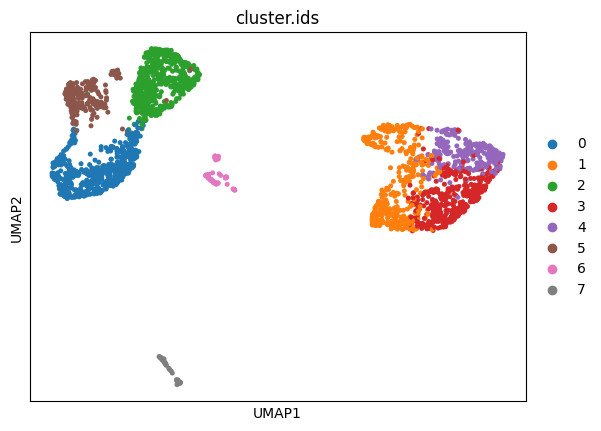

In [7]:
sc.pl.umap(adata, color="cluster.ids", layer="logCP10K")

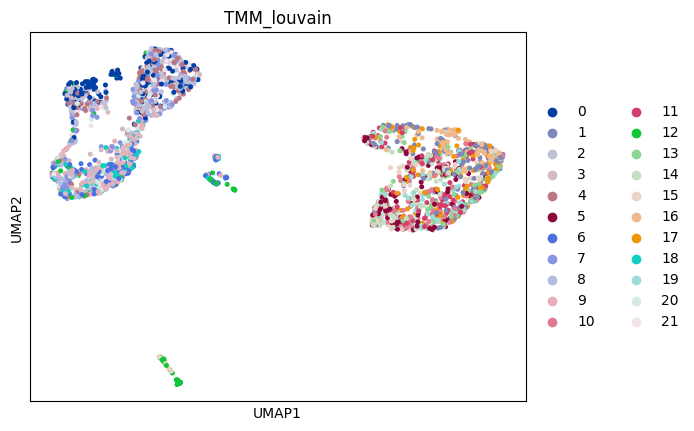

In [6]:
sc.pl.umap(adata, color="TMM_louvain", layer="TMM")

In [5]:
adata.obs

,SAVER_leiden,SAVER_louvain
10X_P4_3_AAAGTAGAGATGCCAG,22,16
10X_P4_3_AACTCCCGTCGGGTCT,34,3
10X_P4_3_AACTCTTAGTTGCAGG,19,15
10X_P4_3_AACTCTTTCATAACCG,15,18
10X_P4_3_AAGACCTAGGTGGGTT,19,15
...,...,...
10X_P7_7_TTGTAGGCACTTGGAT,38,24
10X_P7_7_TTGTAGGTCATGTAGC,13,6
10X_P7_7_TTTACTGGTGTTGAGG,3,13
10X_P7_7_TTTCCTCCATACCATG,45,0


In [3]:
from tools.visualization.plot import plot_UMAP

umap_plot_3d = plot_UMAP(adata, layer="SAVER", clustering_plot_type="SAVER_leiden", n_dim=3)

[DEBUG] generating new UMAP plot
Ploting 3D UMAP...


In [4]:
umap_plot_3d

'{"data": [{"type": "scatter3d", "x": [-4.590389251708984, -3.18719744682312, -5.214765548706055, -4.73380184173584, -4.92758846282959, -3.8998162746429443, -4.66331148147583, -3.156130313873291, -4.87508487701416, -5.092537879943848, -4.83046817779541, -5.050281524658203, -3.1892287731170654, -5.084712028503418, -5.1922173500061035, -3.3133647441864014, -4.4734721183776855, -5.227365970611572, -5.188385486602783, -4.238032341003418, -5.144351005554199, -3.0114176273345947, -5.026097774505615, -4.0616841316223145, -3.2516026496887207, -4.343137741088867, -3.6676957607269287, -4.776633262634277, -3.201849937438965, -4.144516468048096, -4.493862628936768, -4.964906692504883, -3.6500844955444336, -4.018718242645264, -3.532526731491089, -5.044109344482422, -3.6202235221862793, -4.614030838012695, -3.743220090866089, -4.224905014038086, -4.320715427398682, -4.525289535522461, -3.2875266075134277, -5.029092311859131, -3.474612236022949, -4.0625529289245605, -3.4158220291137695, -5.2396321296